# Umesh Dhakal
# MSCS632
# Lab 4
# Regression Analysis with Regularization Techniques

In [1]:
# All the required libries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# Loading dataset
diabetes = load_diabetes()

# Creating DataFrame
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Basic dataset information
print("Feature Names:", diabetes.feature_names)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Shape of X: (442, 10)
Shape of y: (442,)


In [3]:
# Few rows of data
X.head()

# Checking missing values
print(X.isnull().sum())

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


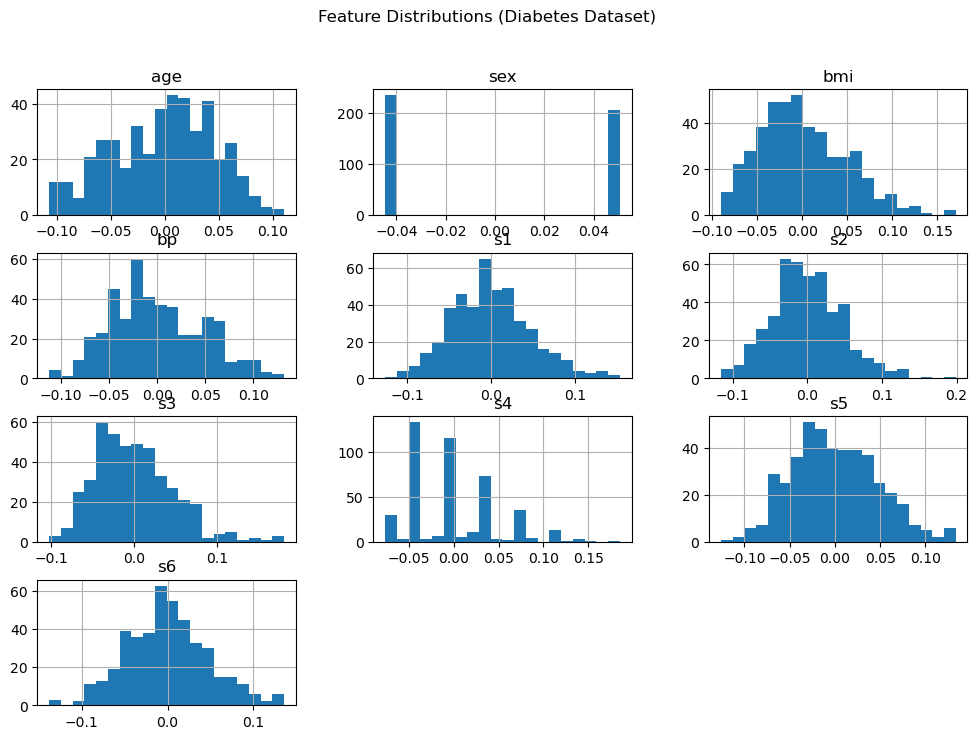

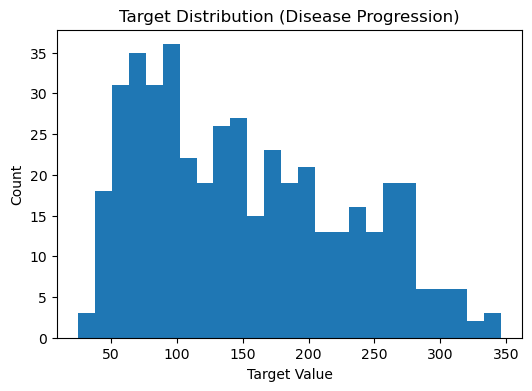

In [4]:
# Feature distributions
X.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions (Diabetes Dataset)")
plt.show()

# Target distributions
plt.figure(figsize=(6, 4))
plt.hist(y, bins=25)
plt.title("Target Distribution (Disease Progression)")
plt.xlabel("Target Value")
plt.ylabel("Count")
plt.show()

In [5]:
# Creating a function to evaluate regression models
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return {
        "Model": model_name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }

# Predicted vs actual values
def plot_predicted_vs_actual(y_true, y_pred, title="Predicted vs Actual"):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.title(title)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")

    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], linewidth=2)
    plt.show()

In [6]:
# Linear Regression using one feature
feature_single = "bmi"
X_single = X[[feature_single]]

# Splitting data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y, test_size=0.2, random_state=42
)
feature_single = "bmi"
X_train_1 = X_train_all[[feature_single]]
X_test_1  = X_test_all[[feature_single]]
y_train_1 = y_train_all
y_test_1  = y_test_all

# Model traning
simple_lr = LinearRegression()
simple_lr.fit(X_train_1, y_train_1)

# Predictions
y_pred_1 = simple_lr.predict(X_test_1)

# Performance
results = []
results.append(evaluate_model(y_test_1, y_pred_1, model_name="Simple Linear Regression (bmi)"))
pd.DataFrame(results)

,Model,MAE,MSE,RMSE,R2
0,Simple Linear Regression (bmi),52.259976,4061.825928,63.732456,0.23335


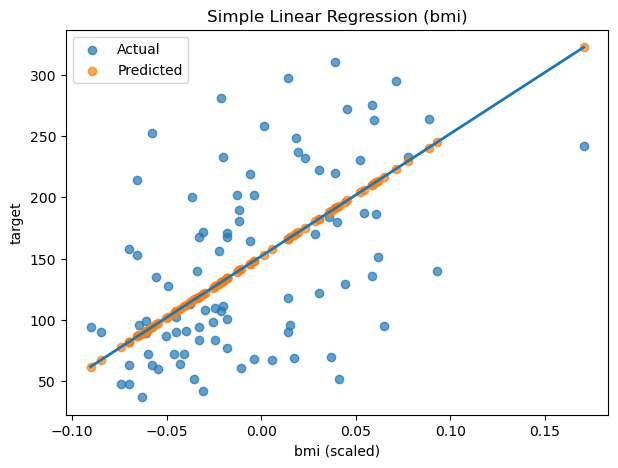

In [7]:
# Visualization of Linear Regression
plt.figure(figsize=(7, 5))
plt.scatter(X_test_1, y_test_1, label="Actual", alpha=0.7)
plt.scatter(X_test_1, y_pred_1, label="Predicted", alpha=0.7)

# Plotting best-fit line
sorted_idx = np.argsort(X_test_1.values.flatten())
plt.plot(X_test_1.values.flatten()[sorted_idx], y_pred_1[sorted_idx], linewidth=2)

plt.title("Simple Linear Regression (bmi)")
plt.xlabel("bmi (scaled)")
plt.ylabel("target")
plt.legend()
plt.show()

In [8]:
# Multiple Linear Regression

# Training the model
multi_lr = LinearRegression()
multi_lr.fit(X_train_all, y_train_all)

# Predictions
y_pred_all = multi_lr.predict(X_test_all)
results.append(evaluate_model(y_test_all, y_pred_all, model_name="Multiple Linear Regression (all features)"))
pd.DataFrame(results)

,Model,MAE,MSE,RMSE,R2
0,Simple Linear Regression (bmi),52.259976,4061.825928,63.732456,0.233350
1,Multiple Linear Regression (all features),42.794095,2900.193628,53.853446,0.452603


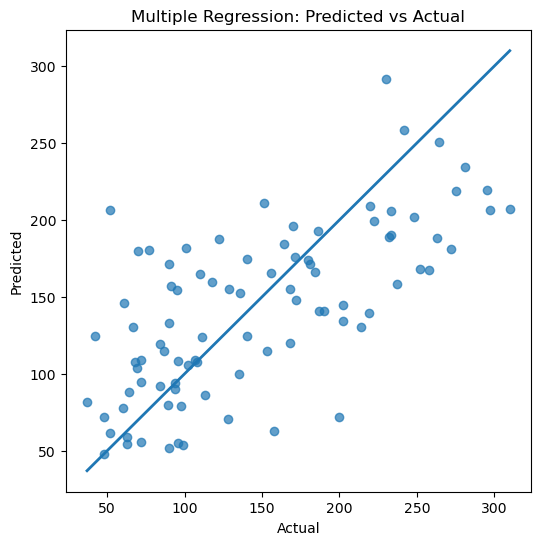

In [9]:
# Visualization of  Multiple Linear Regression
plot_predicted_vs_actual(y_test_all, y_pred_all, title="Multiple Regression: Predicted vs Actual")

C:\Users\umesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\umesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\umesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\umesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\umesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


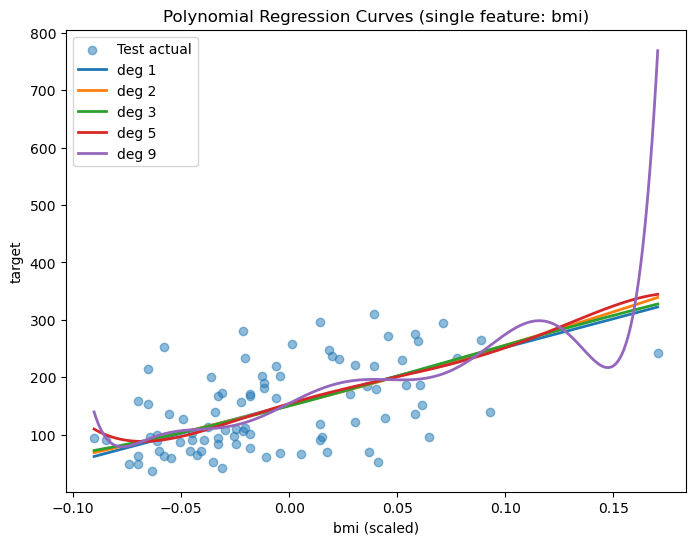

,Model,Train_R2,R2,MAE,MSE,RMSE
0,Polynomial Regression (deg=1),0.365724,0.233350,52.259976,4061.825928,63.732456
1,Polynomial Regression (deg=2),0.366511,0.228972,52.383912,4085.025481,63.914204
2,Polynomial Regression (deg=3),0.366656,0.232856,52.181400,4064.443384,63.752987
3,Polynomial Regression (deg=5),0.370719,0.228817,51.884611,4085.845567,63.920619
4,Polynomial Regression (deg=9),0.385345,-0.359970,57.467425,7205.328683,84.884208


In [10]:
# Polynomial Regression

# Polynomial degrees we are testing
degrees = [1, 2, 3, 5, 9]

poly_results = []

# Creating smooth x values for curve plotting
x_plot = np.linspace(X_single.min().values[0], X_single.max().values[0], 300).reshape(-1, 1)

plt.figure(figsize=(8, 6))
plt.scatter(X_test_1, y_test_1, alpha=0.5, label="Test actual")

for d in degrees:
    # Polynomial regression pipeline
    poly_model = Pipeline([
        ("poly", PolynomialFeatures(degree=d, include_bias=False)),
        ("lr", LinearRegression())
    ])

    # Training the model
    poly_model.fit(X_train_1, y_train_1)

    # Prediction on test data
    y_pred_poly = poly_model.predict(X_test_1)

    # Prediction on train data 
    y_train_pred_poly = poly_model.predict(X_train_1)

    # Calculating train vs test R2 to observe overfitting
    train_r2 = r2_score(y_train_1, y_train_pred_poly)
    test_r2 = r2_score(y_test_1, y_pred_poly)

    poly_results.append({
        "Model": f"Polynomial Regression (deg={d})",
        "Train_R2": train_r2,
        "R2": test_r2,
        "MAE": mean_absolute_error(y_test_1, y_pred_poly),
        "MSE": mean_squared_error(y_test_1, y_pred_poly),
        "RMSE": np.sqrt(mean_squared_error(y_test_1, y_pred_poly))
    })

    # Plot curve
    y_curve = poly_model.predict(x_plot)
    plt.plot(x_plot, y_curve, linewidth=2, label=f"deg {d}")

plt.title("Polynomial Regression Curves (single feature: bmi)")
plt.xlabel("bmi (scaled)")
plt.ylabel("target")
plt.legend()
plt.show()

pd.DataFrame(poly_results)

### Demonstrate how increasing the polynomial degree can affect overfitting and underfitting. 
- I tested polynomial regression using bmi with different degrees to see how model complexity changes performance.

### Observation
- Degrees 2–5 did not improve results compared to degree 1.
- Degree 9 shows overfitting: Train R² goes up, but Test R² becomes negative and RMSE becomes much worse.

In [11]:
# Ridge Regression

# Testing different alpha values
alphas = [0.01, 0.1, 1, 10, 100]

ridge_results = []

for a in alphas:
    # Creating Ridge pipeline with scaling (important for regularization)
    ridge_model = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha=a))
    ])

    # Training model
    ridge_model.fit(X_train_all, y_train_all)

    # Predictions
    y_pred_ridge = ridge_model.predict(X_test_all)

    # Performance
    ridge_results.append(evaluate_model(y_test_all, y_pred_ridge, model_name=f"Ridge (alpha={a})"))

pd.DataFrame(ridge_results)

,Model,MAE,MSE,RMSE,R2
0,Ridge (alpha=0.01),42.794171,2900.075130,53.852346,0.452625
1,Ridge (alpha=0.1),42.796235,2899.054556,53.842869,0.452818
2,Ridge (alpha=1),42.811999,2892.014566,53.777454,0.454147
3,Ridge (alpha=10),42.856825,2875.778718,53.626288,0.457211
4,Ridge (alpha=100),43.250653,2858.224287,53.462363,0.460524


In [12]:
# Lasso Regression

lasso_results = []
# alphas = [0.01, 0.1, 1, 10, 100]
for a in alphas:
    # Lasso pipeline with scaling
    lasso_model = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(alpha=a, max_iter=20000))
    ])

    # Training model
    lasso_model.fit(X_train_all, y_train_all)

    # Predictions
    y_pred_lasso = lasso_model.predict(X_test_all)

    # Performance
    lasso_results.append(evaluate_model(y_test_all, y_pred_lasso, model_name=f"Lasso (alpha={a})"))

    # Lasso results
pd.DataFrame(lasso_results)

,Model,MAE,MSE,RMSE,R2
0,Lasso (alpha=0.01),42.795018,2898.368019,53.836493,0.452947
1,Lasso (alpha=0.1),42.805234,2884.624289,53.708698,0.455541
2,Lasso (alpha=1),42.802984,2824.568094,53.146666,0.466877
3,Lasso (alpha=10),44.764599,2933.834730,54.164885,0.446253
4,Lasso (alpha=100),64.006461,5361.533457,73.222493,-0.011963


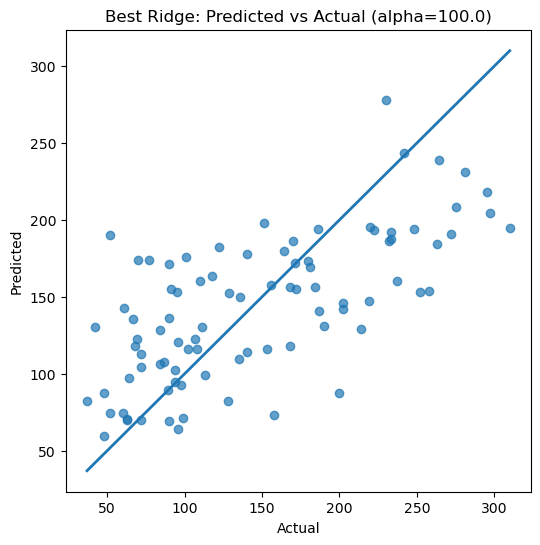

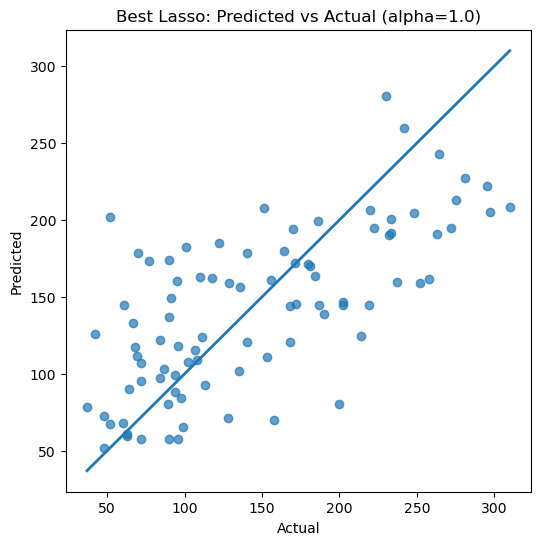

In [13]:
# Best Ridge and Lasso models based on RMSE
ridge_df = pd.DataFrame(ridge_results).sort_values("RMSE")
lasso_df = pd.DataFrame(lasso_results).sort_values("RMSE")

best_ridge_name = ridge_df.iloc[0]["Model"]
best_lasso_name = lasso_df.iloc[0]["Model"]

# Best alpha values from model
best_ridge_alpha = float(best_ridge_name.split("=")[1].replace(")", ""))
best_lasso_alpha = float(best_lasso_name.split("=")[1].replace(")", ""))

# Training best Ridge model
best_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=best_ridge_alpha))
])
best_ridge.fit(X_train_all, y_train_all)
pred_best_ridge = best_ridge.predict(X_test_all)

# Training best Lasso model
best_lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=best_lasso_alpha, max_iter=20000))
])
best_lasso.fit(X_train_all, y_train_all)
pred_best_lasso = best_lasso.predict(X_test_all)

# Best Ridge predicted vs actual
plot_predicted_vs_actual(y_test_all, pred_best_ridge, title=f"Best Ridge: Predicted vs Actual (alpha={best_ridge_alpha})")

# Best Lasso predicted vs actual
plot_predicted_vs_actual(y_test_all, pred_best_lasso, title=f"Best Lasso: Predicted vs Actual (alpha={best_lasso_alpha})")

In [14]:
# Check how Lasso performs feature selection by shrinking some coefficients to zero
lasso_coeffs = best_lasso.named_steps["lasso"].coef_

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lasso_coeffs
})

num_zero = (coef_df["Coefficient"] == 0).sum()
print("Number of coefficients shrunk to zero:", num_zero)

# Display coefficients sorted by absolute value
coef_df["AbsCoeff"] = coef_df["Coefficient"].abs()
coef_df.sort_values("AbsCoeff", ascending=False).drop(columns=["AbsCoeff"])

Number of coefficients shrunk to zero: 1


,Feature,Coefficient
2,bmi,26.219225
8,s5,22.636465
3,bp,15.657314
1,sex,-9.297519
6,s3,-9.024087
4,s1,-8.228172
7,s4,3.420861
9,s6,2.098647
0,age,0.687032
5,s2,-0.000000


### Explain how regularization parameters (alpha values) influence the model’s behavior and results. 
- Small alpha (0.01, 0.1) behaved similar to normal linear regression.
- Moderate alpha (like 1) improved performance slightly.
- Very large alpha (like 100) made the model too simple (underfitting).  
  Example: Lasso with alpha=100 had R² ≈ -0.012 and RMSE ≈ 73.22, which is much worse.

### Lasso feature selection
Lasso shrunk 1 coefficient to zero, meaning it removed one feature from the model (feature: s2 became 0).

In [15]:
# Model Comparison and Analysis

# Combined results
all_results = pd.concat([
    pd.DataFrame(results),
    pd.DataFrame(poly_results),
    pd.DataFrame(ridge_results),
    pd.DataFrame(lasso_results)
], ignore_index=True)

# Sorting by RMSE
all_results_sorted = all_results.sort_values("RMSE")
all_results_sorted

,Model,MAE,MSE,RMSE,R2,Train_R2
14,Lasso (alpha=1),42.802984,2824.568094,53.146666,0.466877,NaN
11,Ridge (alpha=100),43.250653,2858.224287,53.462363,0.460524,NaN
10,Ridge (alpha=10),42.856825,2875.778718,53.626288,0.457211,NaN
13,Lasso (alpha=0.1),42.805234,2884.624289,53.708698,0.455541,NaN
9,Ridge (alpha=1),42.811999,2892.014566,53.777454,0.454147,NaN
12,Lasso (alpha=0.01),42.795018,2898.368019,53.836493,0.452947,NaN
8,Ridge (alpha=0.1),42.796235,2899.054556,53.842869,0.452818,NaN
7,Ridge (alpha=0.01),42.794171,2900.075130,53.852346,0.452625,NaN
1,Multiple Linear Regression (all features),42.794095,2900.193628,53.853446,0.452603,NaN
15,Lasso (alpha=10),44.764599,2933.834730,54.164885,0.446253,NaN


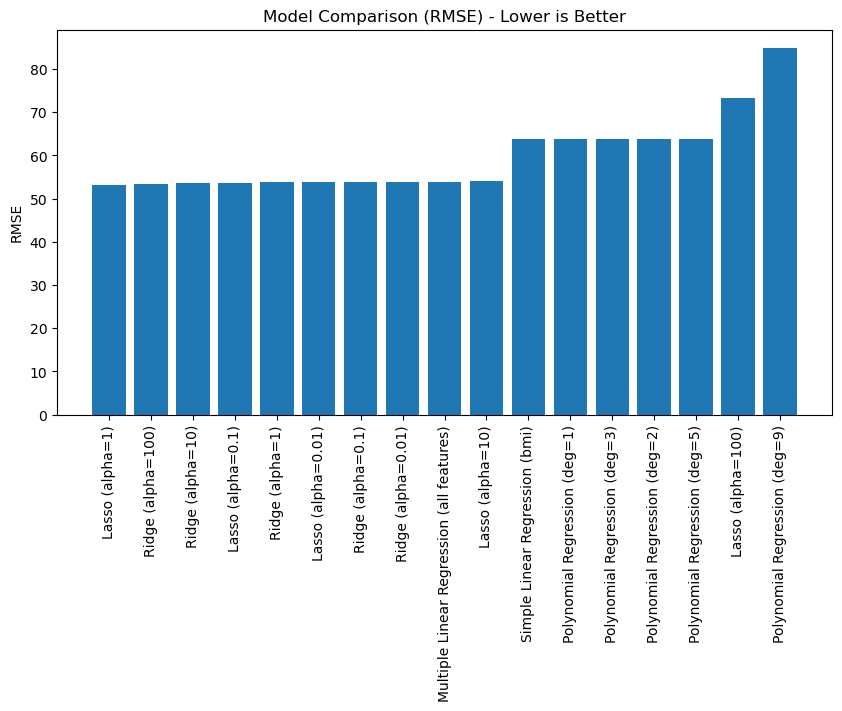

In [16]:
# Visualization using RMSE
plt.figure(figsize=(10, 5))
plt.bar(all_results_sorted["Model"], all_results_sorted["RMSE"])
plt.title("Model Comparison (RMSE) - Lower is Better")
plt.ylabel("RMSE")
plt.xticks(rotation=90)
plt.show()

## Model Comparison and Final Analysis

### Which model performed best?
Based on my results, the best model was:

**Lasso Regression (alpha = 1)**  
- RMSE: **53.15** lowest RMSE 
- R²: **0.4669** highest R²

### Overall performance pattern
- **Simple Linear (bmi)** had the weakest performance (RMSE 63.73, R² 0.2334).
- **Multiple Linear Regression** improved a lot (RMSE 53.85, R² 0.4526).
- **Polynomial Regression** did not help here, and high degree (9) strongly overfit (negative Test R²).
- **Ridge and Lasso** slightly improved performance over multiple regression.
- Lasso was best and also did light feature selection (1 coefficient shrunk to zero).

### Key Insight
- Using all features improved performance a lot compared to using only bmi.
- Polynomial regression did not improve results and high degree caused overfitting.
- Ridge and Lasso helped slightly by reducing overfitting.
- Lasso performed best and also removed 1 feature by shrinking its coefficient to zero (s2).
### Conclusion
Using more features helped the most, and regularization,especially Lasso gave a small but real improvement and helped control overfitting.